# Heap sorts

This file demonstrates data on the performance of various heap-based sorting algorithms. The following algorithms were used:

- Binary-heap-based heap sort
- d-heap-based heap sort (for d in { 5, 10, 25, 50, 100, 200, 300, 400, 500, 1000 })
- Optimized d-heap-based sort (children of each node form a heap)

## Testing methods
- Each algorithm was tested on random data with sample size ranging from $10^5$ to $10^7$ with step size of $10^5$.
- Each test was performed 5 times and the average time was taken as a result.
- Seed for random number generator was created once and reused for each algorithm, which guarantees that the same array was generated for each algorithm.
- If any test took more than one minute, the test was not repeated and no further testing was done

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv_files = ["results/bin_heap_sort.csv", "results/heap_sort.csv"]
df = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)
df = df.pivot(index="Sample Size", columns="Algorithm", values="Elapsed Time (ms)")
print(df.head(3))

Algorithm    HeapHeapSort10  HeapHeapSort100  HeapHeapSort1000  \
Sample Size                                                      
100000              32090.0          35621.0           35156.0   
200000             128441.0         143118.0          140606.0   
300000                  NaN              NaN               NaN   

Algorithm    HeapHeapSort200  HeapHeapSort25  HeapHeapSort300  \
Sample Size                                                     
100000               35461.0         34514.0          35380.0   
200000              142280.0        138341.0         142255.0   
300000                   NaN             NaN              NaN   

Algorithm    HeapHeapSort400  HeapHeapSort5  HeapHeapSort50  HeapHeapSort500  \
Sample Size                                                                    
100000               35370.0        27101.0         36280.0          35240.0   
200000              141868.0       108455.0        145354.0         140949.0   
300000                 

<Axes: title={'center': 'Heap Sorts Performance (log scale)'}, xlabel='Sample Size', ylabel='Elapsed Time (ms)'>

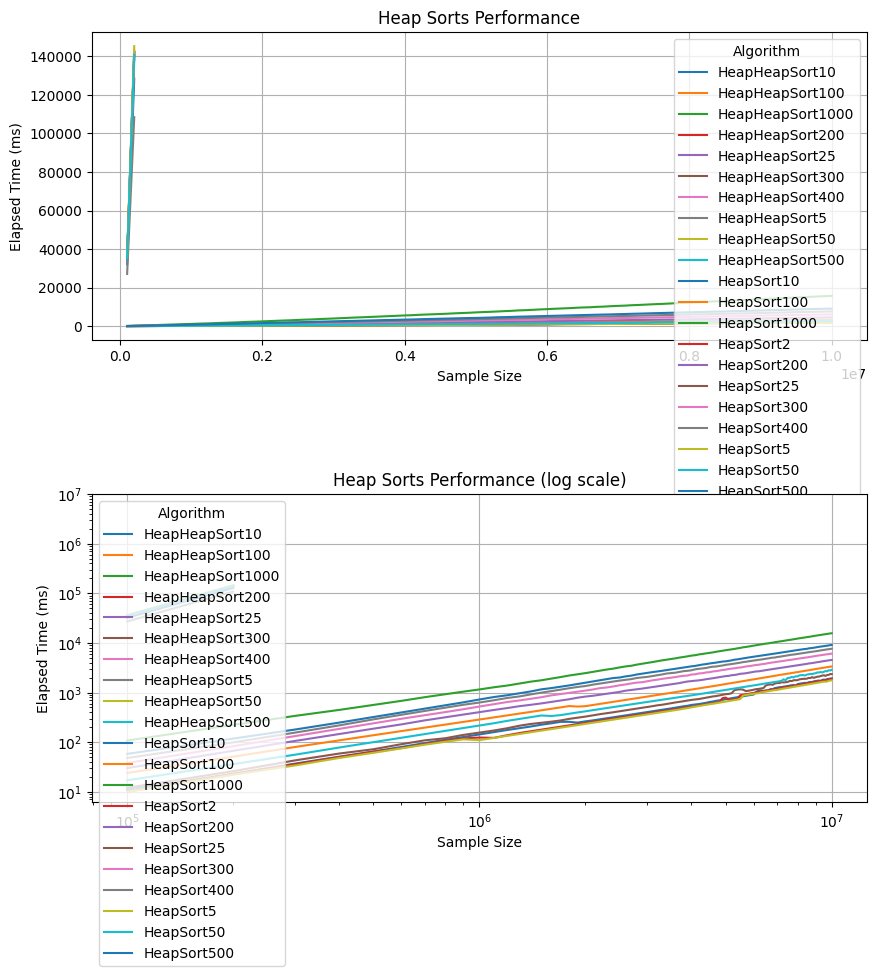

In [3]:
figure, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
linear_scale, log_scale = axes
figure.subplots_adjust(hspace=0.5)
df.plot(
        ax=linear_scale,
        ylabel="Elapsed Time (ms)",
        title="Heap Sorts Performance",
        grid=True)
df[df.values > 0].plot(
        ax=log_scale,
        loglog=True,
        ylabel="Elapsed Time (ms)",
        title="Heap Sorts Performance (log scale)",
        yticks=np.logspace(1, 7, 7, base=10),
        grid=True)

As we can see, optimized algorithms behave very poorly, and we shall inspect the non-optimized versions separately.

<Axes: title={'center': 'Heap Sorts Performance (log scale)'}, xlabel='Sample Size', ylabel='Elapsed Time (ms)'>

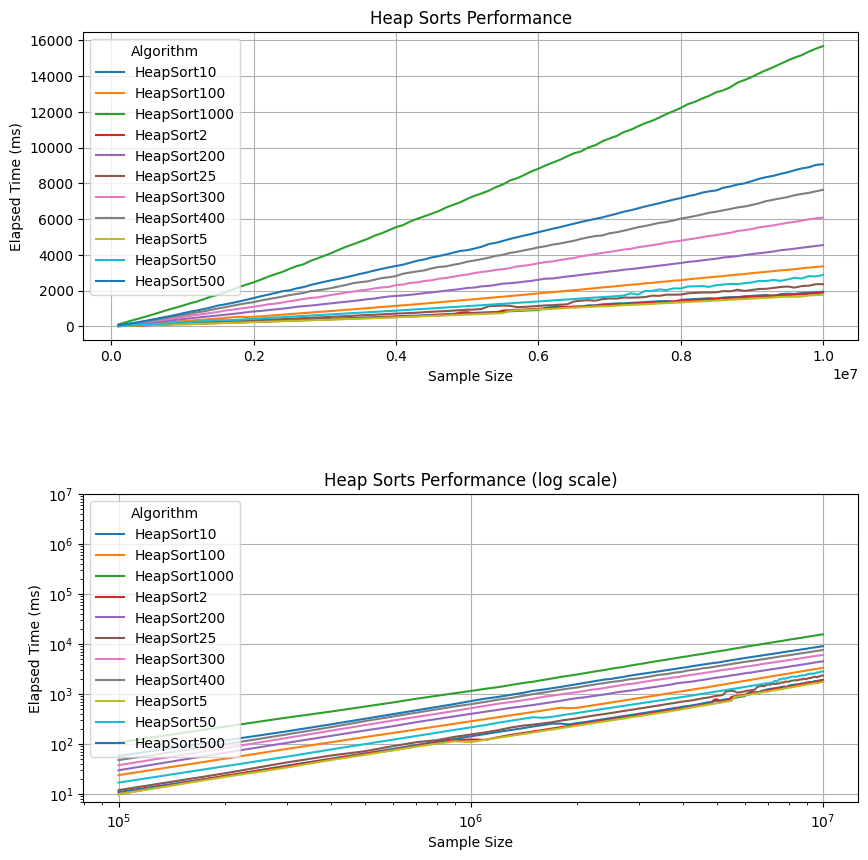

In [4]:
figure, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
linear_scale, log_scale = axes
figure.subplots_adjust(hspace=0.5)
heap_cols = [col for col in df.columns if "HeapHeap" not in col]
df[heap_cols].plot(
        ax=linear_scale,
        ylabel="Elapsed Time (ms)",
        title="Heap Sorts Performance",
        grid=True)
df[heap_cols][df.values > 0].plot(
        ax=log_scale,
        loglog=True,
        ylabel="Elapsed Time (ms)",
        title="Heap Sorts Performance (log scale)",
        yticks=np.logspace(1, 7, 7, base=10),
        grid=True)

As we can see, the various d-heap-based heap sort algorithms seem to behave similarly, however their performance seems to become worse with increasing values of d. The best performance is achieved with binary, 5-ary and 10-ary heaps.

The straightforward implementation of 'children-heap' optimization has time complexity of $O(n^2)$ and exceeds the time limit of 1 minute already in the second test. The research on the internet has failed to find any mention, let alone implementation, of this optimized algorithm, which suggests that the ideal implementation with the desired time complexity of $O(n \log_k n \lg k)$ is non-trivial and needs to be researched more thoroughly.

## Conclusions

The heap-based sorts do not seem to present the researchers with a wide range of possible optimizations. Increasing the values of d for d-heaps has a noticeable negative effect on the performance of an algorithm. While the d-heap optimization of organizing the children nodes in a binary heap seems logical, the straightforward implementation is has a quadratic time complexity, while the more optimal one remains an open research topic.

The fastest heap sort algorithm can therefore be implemented with a simple binary heap. This algorithm is concise, easy to implement and debug and is able to sort an array non-recursively and in-place (without additional memory) while maintaining $O(n \log n)$ time complexity.